# Color nonlinearities

The idea is to generate a gradient of colors which are linearly spaced in the ATD color spaces (oponent color channels) and then check if the response of a model is linear or not (it shouldn't be).

## Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%cd ..
from color_matrices import *

/media/disk/users-muten/vitojor/PerceptualTests


## Generating the colors

In [3]:
N = 11
img_size = (256,256)

In [37]:
atd = np.array([[10,a,0] for a in np.linspace(-5,5,N)]).T
atd.shape

(3, 11)

In [38]:
def atd2rgb(atd):
    """
    Expects and atd color column vector.
    """
    rgb = Mxyz2ng@Matd2xyz@atd
    rgb = np.power(rgb, gamma[:,None])
    return rgb

In [39]:
rgb = atd2rgb(atd)
rgb.shape

(3, 11)

In [40]:
imgs = np.ones(shape=(*img_size,3,N))
imgs *= rgb[None,None,:,:]

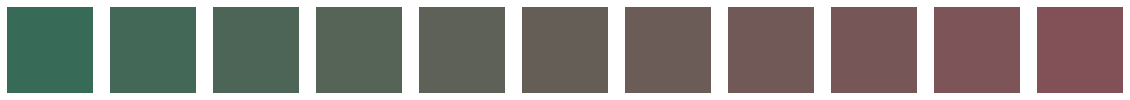

In [41]:
fig, ax = plt.subplots(1,N, figsize=(20,10))

for i in range(N):
    ax[i].imshow(imgs[:,:,:,i])
    ax[i].axis('off')
plt.show()

## Passing the colors through the network

As an example we'll use a fake model that we can override at any time:

In [42]:
class FakeNetwork():
    def __call__(self, X):
        return X
    def predict(self, X):
        return self(X)

In [43]:
model = FakeNetwork()

Adjust the shape of `imgs`:

In [44]:
batch_imgs = imgs.transpose(3,0,1,2)
batch_imgs.shape

(11, 256, 256, 3)

Obtain the outputs:

In [45]:
outputs = model.predict(batch_imgs)

Get the readouts as the distance to the central image (white):

In [46]:
readouts = (outputs-outputs[N//2])**2
readouts = np.sqrt(np.sum(readouts.reshape(N,-1), axis=-1))
readouts

array([47.69598314, 35.13100086, 24.75338564, 15.69146291,  7.52176634,
        0.        ,  7.03079333, 13.6795149 , 20.02644773, 26.13395948,
       32.05294492])

Plot the results:

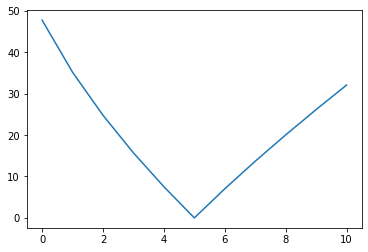

In [47]:
plt.figure()
plt.plot(readouts)
plt.show()